In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [2]:
# Initialising the CNN
classifier = Sequential()

In [3]:
# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))


In [4]:
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))


In [5]:
# Adding a second convolutional layer
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))


In [6]:
# Step 3 - Flattening
classifier.add(Flatten())


In [8]:
# Step 4 - Full connection
classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dense(1, activation = 'sigmoid'))


In [9]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [19]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator
# Split into train/test datasets using all of the pictures

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('ai_coding_test-main/train/',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('ai_coding_test-main/test/',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

history = classifier.fit_generator(training_set,
                         steps_per_epoch = 50,
                         epochs = 25,
                         validation_data = test_set,
                         validation_steps = 30)

Found 2212 images belonging to 1 classes.
Found 1089 images belonging to 2 classes.


/home/blah/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
50/50 [==============================] - 14s 280ms/step - loss: 4.9395e-04 - accuracy: 1.0000 - val_loss: 0.0643 - val_accuracy: 0.9917
Epoch 2/25
50/50 [==============================] - 13s 268ms/step - loss: 4.5352e-04 - accuracy: 1.0000 - val_loss: 0.0569 - val_accuracy: 0.9927
Epoch 3/25
50/50 [==============================] - 14s 272ms/step - loss: 4.1757e-04 - accuracy: 1.0000 - val_loss: 0.0574 - val_accuracy: 0.9927
Epoch 4/25
50/50 [==============================] - 13s 267ms/step - loss: 3.8554e-04 - accuracy: 1.0000 - val_loss: 0.0662 - val_accuracy: 0.9917
Epoch 5/25
50/50 [==============================] - 13s 269ms/step - loss: 3.5701e-04 - accuracy: 1.0000 - val_loss: 0.0668 - val_accuracy: 0.9917
Epoch 6/25
50/50 [==============================] - 13s 269ms/step - loss: 3.3125e-04 - accuracy: 1.0000 - val_loss: 0.0506 - val_accuracy: 0.9937
Epoch 7/25
50/50 [==============================] - 13s 269ms/step - loss: 3.0808e-04 - accuracy: 1.0000 - val_loss: 0

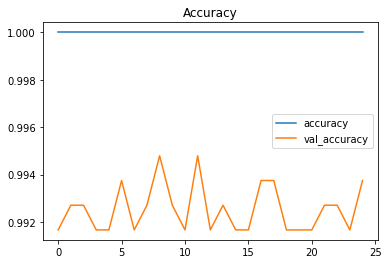

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

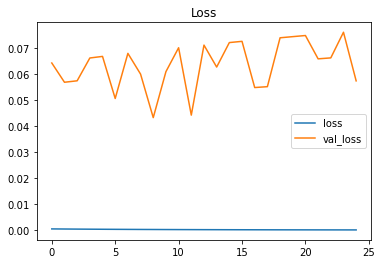

In [21]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [31]:
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# # Predict the label of the test_images

# creating an empty list
import numpy as np
pred = classifier.predict(test_set)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (training_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]



/home/blah/anaconda3/lib/python3.8/site-packages/PIL/Image.py:973: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [32]:
print(pred)

['apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 